In [123]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [128]:
df = pd.read_csv('data/games0108.csv', sep='\t')
pred_df = pd.read_csv('data/pred0108.csv', sep='\t')

In [129]:
df.head()

,contest,year,month,day,time,break,hoamTeam,guestTeam,resultNumeric,homeTotalGoalsShoot,...,homeTeamGoalsDiffAway,guestTeamGoalsShootAtHome,guestTeamGoalsReceivedAtHome,guestTeamGoalsDiffAtHome,guestTeamGoalsShootAway,guestTeamGoalsReceivedAway,guestTeamGoalsDiffAway,hoamAvgPoints,guestAvgpoints,fortlfd
0,UEFA CL-Qualifikation UEFA Champions League-Q...,2017,7,Di,20:30,45,Hibernians FC,Red Bull Salzburg,-3.0,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
1,ÖFB-Cup ÖFB-Cup,2017,7,Sa,17:00,4,Deutschlandsberger SC,Red Bull Salzburg,-7.0,0.00,...,0.0,0.0,0.0,0.0,3.0,0.0,3.0,0.0,3.0,2
2,UEFA CL-Qualifikation UEFA Champions League-Q...,2017,7,Mi,20:30,4,Red Bull Salzburg,Hibernians FC,3.0,5.00,...,5.0,0.0,3.0,-3.0,0.0,0.0,0.0,3.0,0.0,3
3,Bundesliga Bundesliga,2017,7,Sa,18:30,3,Wolfsberger AC,Red Bull Salzburg,-2.0,0.00,...,0.0,3.0,0.0,3.0,5.0,0.0,5.0,0.0,3.0,4
4,UEFA CL-Qualifikation UEFA Champions League-Q...,2017,7,Mi,18:45,4,Red Bull Salzburg,HNK Rijeka,0.0,3.75,...,4.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,5


In [130]:
pred_df.head()

,contest,year,month,day,time,break,hoamTeam,guestTeam,resultNumeric,homeTotalGoalsShoot,...,homeTeamGoalsDiffAway,guestTeamGoalsShootAtHome,guestTeamGoalsReceivedAtHome,guestTeamGoalsDiffAtHome,guestTeamGoalsShootAway,guestTeamGoalsReceivedAway,guestTeamGoalsDiffAway,hoamAvgPoints,guestAvgpoints,fortlfd
0,Bundesliga Bundesliga,2019,8,Sa,17:00,6,SK Rapid Wien,SC Rheindorf Altach,NaN,1.568627,...,-0.111111,1.666667,1.888889,-0.222222,1.444444,1.000000,0.444444,1.450980,1.166667,528
1,Bundesliga Bundesliga,2019,8,Sa,17:00,7,FC Admira Wacker Mödling,LASK,NaN,1.166667,...,-1.105263,2.190476,0.857143,1.333333,2.136364,0.772727,1.363636,0.833333,2.046512,529
2,Bundesliga Bundesliga,2019,8,Sa,17:00,6,Red Bull Salzburg,Wolfsberger AC,NaN,2.574074,...,1.448276,1.631579,1.368421,0.263158,1.388889,1.444444,-0.055556,2.518519,1.486486,530
3,Bundesliga Bundesliga,2019,8,So,17:00,8,TSV Hartberg,SK Sturm Graz,NaN,1.675676,...,-1.111111,1.263158,1.473684,-0.210526,0.952381,1.238095,-0.285714,1.216216,1.150000,531
4,Bundesliga Bundesliga,2019,8,So,17:00,8,WSG Tirol,SKN St. Pölten,NaN,1.666667,...,-2.000000,1.235294,1.411765,-0.176471,1.285714,1.857143,-0.571429,1.000000,1.184211,532


In [131]:
df_id = df['fortlfd']
pred_id = pred_df['fortlfd']

df = df.drop("fortlfd", axis = 1)
pred_df = pred_df.drop("fortlfd", axis = 1)

df.shape, pred_df.shape

((527, 29), (6, 29))

In [132]:
df_id.head()

0    1
1    2
2    3
3    4
4    5
Name: fortlfd, dtype: int64

In [133]:
pred_id.head()

0    528
1    529
2    530
3    531
4    532
Name: fortlfd, dtype: int64

In [134]:
# df['result'] = np.where(df.resultNumeric < 0, 'lost', np.where(df.resultNumeric > 0, 'won', 'draw'))

In [135]:
y_reg = df.resultNumeric
y_cat = (pd.get_dummies(np.where(df.resultNumeric < 0, 'lost', np.where(df.resultNumeric > 0, 'won', 'draw'))))

In [136]:
ndf = df.shape[0]
npred = pred_df.shape[0]


df = pd.concat([df, pred_df])
df = df.drop(['resultNumeric'], axis=1)

df.shape

(533, 28)

In [137]:
ndf, npred

(527, 6)

In [138]:
df.head()

,contest,year,month,day,time,break,hoamTeam,guestTeam,homeTotalGoalsShoot,homeTotalGoalsReceived,...,homeTeamGoalsReceivedAway,homeTeamGoalsDiffAway,guestTeamGoalsShootAtHome,guestTeamGoalsReceivedAtHome,guestTeamGoalsDiffAtHome,guestTeamGoalsShootAway,guestTeamGoalsReceivedAway,guestTeamGoalsDiffAway,hoamAvgPoints,guestAvgpoints
0,UEFA CL-Qualifikation UEFA Champions League-Q...,2017,7,Di,20:30,45,Hibernians FC,Red Bull Salzburg,0.00,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,ÖFB-Cup ÖFB-Cup,2017,7,Sa,17:00,4,Deutschlandsberger SC,Red Bull Salzburg,0.00,0.0,...,0.0,0.0,0.0,0.0,0.0,3.0,0.0,3.0,0.0,3.0
2,UEFA CL-Qualifikation UEFA Champions League-Q...,2017,7,Mi,20:30,4,Red Bull Salzburg,Hibernians FC,5.00,0.0,...,0.0,5.0,0.0,3.0,-3.0,0.0,0.0,0.0,3.0,0.0
3,Bundesliga Bundesliga,2017,7,Sa,18:30,3,Wolfsberger AC,Red Bull Salzburg,0.00,0.0,...,0.0,0.0,3.0,0.0,3.0,5.0,0.0,5.0,0.0,3.0
4,UEFA CL-Qualifikation UEFA Champions League-Q...,2017,7,Mi,18:45,4,Red Bull Salzburg,HNK Rijeka,3.75,0.0,...,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0


In [139]:
from keras.utils import to_categorical

In [140]:
df_contest = pd.get_dummies(df.contest)
df = pd.concat([df, df_contest], axis=1)
df = df.drop('contest', axis=1)

In [141]:
df_day = pd.get_dummies(df.day)
df = pd.concat([df, df_day], axis=1)
df = df.drop('day', axis=1)

In [142]:
df_time = pd.get_dummies(df.time)
df = pd.concat([df, df_time], axis=1)
df = df.drop('time', axis=1)

In [143]:
df_hoamTeam = pd.get_dummies(df.hoamTeam)
df = pd.concat([df, df_hoamTeam], axis=1)
df = df.drop('hoamTeam', axis=1)

In [144]:
df_guestTeam = pd.get_dummies(df.guestTeam)
df = pd.concat([df, df_guestTeam], axis=1)
df = df.drop('guestTeam', axis=1)

In [145]:
df.shape

(533, 203)

In [146]:
df.head()

,year,month,break,homeTotalGoalsShoot,homeTotalGoalsReceived,homeTotalGoalDiff,guestTotalGoalsShoot,guestTotalGoalsReceived,guestTotalGoalDiff,homeTeamGoalsShootAtHome,...,SV Wimpassing,Shkendija Tetovo,Slovan Bratislava,Spartak Moskau,TSV Hartberg,Vitória Guimarães SC,WSG Tirol,WSG Wattens,Wolfsberger AC,ZSKA Sofia
0,2017,7,45,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0,0,0,0,0,0,0,0,0,0
1,2017,7,4,0.000000,0.000000,0.000000,3.000000,0.000000,3.000000,0.000000,...,0,0,0,0,0,0,0,0,0,0
2,2017,7,4,5.000000,0.000000,5.000000,0.000000,3.000000,-3.000000,0.000000,...,0,0,0,0,0,0,0,0,0,0
3,2017,7,3,0.000000,0.000000,0.000000,4.333333,0.000000,4.333333,0.000000,...,0,0,0,0,0,0,0,0,0,0
4,2017,7,4,3.750000,0.000000,3.750000,0.000000,0.000000,0.000000,3.000000,...,0,0,0,0,0,0,0,0,0,0
5,2017,7,3,3.200000,0.200000,3.000000,0.000000,0.000000,0.000000,2.000000,...,0,0,0,0,0,0,0,0,0,0
6,2017,8,4,1.000000,0.000000,1.000000,2.833333,0.333333,2.500000,0.000000,...,0,0,0,0,0,0,0,0,0,0
7,2017,8,3,2.428571,0.285714,2.142857,0.000000,0.000000,0.000000,1.666667,...,0,0,0,0,0,0,0,0,0,0
8,2017,8,7,0.000000,0.000000,0.000000,2.750000,0.375000,2.375000,0.000000,...,0,0,0,0,0,0,0,0,0,0
9,2017,8,5,0.000000,0.000000,0.000000,2.555556,0.333333,2.222222,0.000000,...,0,0,0,0,0,0,0,0,0,0


In [147]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 533 entries, 0 to 5
Columns: 203 entries, year to ZSKA Sofia
dtypes: float64(20), int64(3), uint8(180)
memory usage: 193.6 KB


In [148]:
X = df[:ndf]
pred_df = df[ndf:]

In [149]:
X.shape, pred_df.shape

((527, 203), (6, 203))

In [150]:
from sklearn.model_selection import train_test_split

In [151]:
X_train, X_test, y_reg_train, y_reg_test, y_class_train, y_class_test = train_test_split(
    X, y_reg, y_cat, test_size=0.2, random_state=123)

In [26]:
from sklearn.preprocessing import StandardScaler

In [27]:
scaler = StandardScaler()

scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [28]:
from keras.models import Model, Sequential
from keras.layers import Dense, Input, BatchNormalization
from keras.utils import plot_model
from keras.callbacks import EarlyStopping, ModelCheckpoint

early_stopping_monitor = EarlyStopping(patience=4)

In [29]:
model_save = ModelCheckpoint('best_model.hdf5', save_best_only=True, monitor='val_Classification_acc')

In [30]:
in_cols=X_train.shape[1]
out_cols=y_cat.shape[1]

in_cols, out_cols

(190, 3)

In [31]:
model_1 = Sequential()

model_1.add(Dense(12, input_shape=(in_cols,), activation='relu', ))
model_1.add(Dense(12, activation='relu'))
model_1.add(Dense(1))


Instructions for updating:
Colocations handled automatically by placer.


In [32]:
model_1.compile(optimizer='adam', loss='mse')

In [33]:
model_1_training = model_1.fit(
    X_train_scaled,
    y_reg_train,
    validation_data=[X_test_scaled,y_reg_test],
    epochs=100
)

Instructions for updating:
Use tf.cast instead.
Train on 417 samples, validate on 105 samples
Epoch 1/100
417/417 [==============================] - 1s 2ms/step - loss: 4.9021 - val_loss: 4.4138
Epoch 2/100
417/417 [==============================] - 0s 125us/step - loss: 4.5563 - val_loss: 4.3340
Epoch 3/100
417/417 [==============================] - 0s 163us/step - loss: 4.3568 - val_loss: 4.2526
Epoch 4/100
417/417 [==============================] - 0s 105us/step - loss: 4.1636 - val_loss: 4.1988
Epoch 5/100
417/417 [==============================] - 0s 153us/step - loss: 3.9858 - val_loss: 4.1677
Epoch 6/100
417/417 [==============================] - 0s 125us/step - loss: 3.8391 - val_loss: 4.1253
Epoch 7/100
417/417 [==============================] - 0s 106us/step - loss: 3.6829 - val_loss: 4.0759
Epoch 8/100
417/417 [==============================] - 0s 153us/step - loss: 3.5146 - val_loss: 4.0382
Epoch 9/100
417/417 [==============================] - 0s 115us/step - loss: 3.3593 

Epoch 77/100
417/417 [==============================] - 0s 106us/step - loss: 1.0518 - val_loss: 3.6502
Epoch 78/100
417/417 [==============================] - 0s 125us/step - loss: 1.0419 - val_loss: 3.6445
Epoch 79/100
417/417 [==============================] - 0s 106us/step - loss: 1.0222 - val_loss: 3.6546
Epoch 80/100
417/417 [==============================] - 0s 125us/step - loss: 1.0111 - val_loss: 3.7033
Epoch 81/100
417/417 [==============================] - 0s 96us/step - loss: 1.0111 - val_loss: 3.7002
Epoch 82/100
417/417 [==============================] - 0s 115us/step - loss: 1.0031 - val_loss: 3.7404
Epoch 83/100
417/417 [==============================] - 0s 115us/step - loss: 0.9965 - val_loss: 3.7612
Epoch 84/100
417/417 [==============================] - 0s 115us/step - loss: 1.0075 - val_loss: 3.8754
Epoch 85/100
417/417 [==============================] - 0s 144us/step - loss: 0.9981 - val_loss: 3.7711
Epoch 86/100
417/417 [==============================] - 0s 115us/

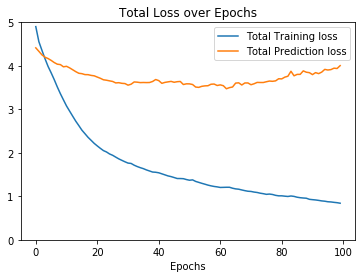

In [34]:
plt.plot(model_1_training.history['loss'])
plt.xlabel('Epochs')
plt.ylim([0, 5])
plt.title('Total Loss over Epochs')
plt.plot(model_1_training.history['val_loss'])
plt.legend(['Total Training loss', 'Total Prediction loss'])

In [35]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

In [36]:
rfr = RandomForestRegressor(n_estimators=1000)

rfr.fit(X_train, y_reg_train)
rfr.score(X_train, y_reg_train)

0.8863154483679847

In [37]:
rfr.score(X_test, y_reg_test)
pred_y = rfr.predict(X_test)

In [38]:
np.sqrt(mean_squared_error(np.exp(y_reg_test), np.exp(pred_y)))

13.508336555366242

In [39]:
input_tensor = Input(shape=(in_cols,))
hidden_1 = Dense(8, activation='relu', name='hidden_1')(input_tensor)
batch_1 = BatchNormalization()(hidden_1)
hidden_2 = Dense(16, activation='relu', name='hidden_2')(batch_1)
batch_2 = BatchNormalization()(hidden_2)
hidden_3 = Dense(16, activation='relu', name='hidden_3')(batch_2)
output_tensor_reg = Dense(1, name='Regression')(hidden_3)

output_tensor_class = Dense(out_cols, activation='sigmoid', name='Classification')(output_tensor_reg)

In [40]:
model_2 = Model(input_tensor, [output_tensor_reg, output_tensor_class])

In [41]:
model_2.compile(loss=['mse', 'categorical_crossentropy'],
             optimizer='adam',
             metrics=['accuracy'])

In [42]:
model_2.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 190)               0         
_________________________________________________________________
hidden_1 (Dense)             (None, 8)                 1528      
_________________________________________________________________
batch_normalization_1 (Batch (None, 8)                 32        
_________________________________________________________________
hidden_2 (Dense)             (None, 16)                144       
_________________________________________________________________
batch_normalization_2 (Batch (None, 16)                64        
_________________________________________________________________
hidden_3 (Dense)             (None, 16)                272       
_________________________________________________________________
Regression (Dense)           (None, 1)                 17        
__________

In [43]:
model_2_training = model_2.fit(
    X_train_scaled,
    [y_reg_train, y_class_train],
    validation_data=(X_test_scaled, [y_reg_test, y_class_test]),
    batch_size=1,
    epochs=50,
    callbacks=[early_stopping_monitor],
    verbose=True)

Train on 417 samples, validate on 105 samples
Epoch 1/50
417/417 [==============================] - 4s 9ms/step - loss: 5.6810 - Regression_loss: 4.5879 - Classification_loss: 1.0930 - Regression_acc: 0.2158 - Classification_acc: 0.4173 - val_loss: 118200.6261 - val_Regression_loss: 118196.6739 - val_Classification_loss: 3.9525 - val_Regression_acc: 0.0000e+00 - val_Classification_acc: 0.3810
Epoch 2/50
417/417 [==============================] - 2s 5ms/step - loss: 5.6648 - Regression_loss: 4.5806 - Classification_loss: 1.0842 - Regression_acc: 0.2158 - Classification_acc: 0.4197 - val_loss: 118895.1257 - val_Regression_loss: 118891.3215 - val_Classification_loss: 3.8047 - val_Regression_acc: 0.0095 - val_Classification_acc: 0.3810
Epoch 3/50
417/417 [==============================] - 2s 5ms/step - loss: 5.6545 - Regression_loss: 4.5768 - Classification_loss: 1.0777 - Regression_acc: 0.2158 - Classification_acc: 0.4197 - val_loss: 128898.2182 - val_Regression_loss: 128894.4480 - val_Cl

In [44]:
input_tensor = Input(shape=(in_cols,))
hidden_1 = Dense(in_cols, activation='relu', name='hidden_1')(input_tensor)
batch_1 = BatchNormalization()(hidden_1)
hidden_2 = Dense(in_cols, activation='relu', name='hidden_2')(batch_1)
output_tensor_reg = Dense(1, name='Regression')(hidden_2)

output_tensor_class = Dense(out_cols, activation='sigmoid', name='Classification')(output_tensor_reg)

In [45]:
model_3 = Model(input_tensor, [output_tensor_reg, output_tensor_class])

In [46]:
model_3.compile(loss=['mse', 'categorical_crossentropy'],
             optimizer='adam',
             metrics=['accuracy'])

In [47]:
model_3.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 190)               0         
_________________________________________________________________
hidden_1 (Dense)             (None, 190)               36290     
_________________________________________________________________
batch_normalization_3 (Batch (None, 190)               760       
_________________________________________________________________
hidden_2 (Dense)             (None, 190)               36290     
_________________________________________________________________
Regression (Dense)           (None, 1)                 191       
_________________________________________________________________
Classification (Dense)       (None, 3)                 6         
Total params: 73,537
Trainable params: 73,157
Non-trainable params: 380
_________________________________________________________________


In [48]:
model_3_training = model_3.fit(
    X_train_scaled,
    [y_reg_train, y_class_train],
    validation_data=(X_test_scaled, [y_reg_test, y_class_test]),
    batch_size=1,
    epochs=100,
    #callbacks=[early_stopping_monitor],
    verbose=True)

Train on 417 samples, validate on 105 samples
Epoch 1/100
417/417 [==============================] - 4s 10ms/step - loss: 5.6843 - Regression_loss: 4.5886 - Classification_loss: 1.0958 - Regression_acc: 0.2158 - Classification_acc: 0.3885 - val_loss: 281.2437 - val_Regression_loss: 277.7415 - val_Classification_loss: 3.5022 - val_Regression_acc: 0.0190 - val_Classification_acc: 0.3333
Epoch 2/100
417/417 [==============================] - 2s 5ms/step - loss: 5.6717 - Regression_loss: 4.5842 - Classification_loss: 1.0875 - Regression_acc: 0.2158 - Classification_acc: 0.4197 - val_loss: 288.5171 - val_Regression_loss: 284.8510 - val_Classification_loss: 3.6661 - val_Regression_acc: 0.0000e+00 - val_Classification_acc: 0.3238
Epoch 3/100
417/417 [==============================] - 2s 6ms/step - loss: 5.6618 - Regression_loss: 4.5800 - Classification_loss: 1.0817 - Regression_acc: 0.2158 - Classification_acc: 0.4197 - val_loss: 268.8510 - val_Regression_loss: 265.1942 - val_Classification_l

Epoch 25/100
417/417 [==============================] - 2s 4ms/step - loss: 5.6331 - Regression_loss: 4.5696 - Classification_loss: 1.0636 - Regression_acc: 0.2158 - Classification_acc: 0.4197 - val_loss: 279.8457 - val_Regression_loss: 276.3749 - val_Classification_loss: 3.4708 - val_Regression_acc: 0.0095 - val_Classification_acc: 0.3619
Epoch 26/100
417/417 [==============================] - 2s 5ms/step - loss: 5.6335 - Regression_loss: 4.5699 - Classification_loss: 1.0636 - Regression_acc: 0.2158 - Classification_acc: 0.4197 - val_loss: 277.8842 - val_Regression_loss: 274.4372 - val_Classification_loss: 3.4470 - val_Regression_acc: 0.0381 - val_Classification_acc: 0.3810
Epoch 27/100
417/417 [==============================] - 2s 4ms/step - loss: 5.6336 - Regression_loss: 4.5700 - Classification_loss: 1.0637 - Regression_acc: 0.2158 - Classification_acc: 0.4197 - val_loss: 285.6798 - val_Regression_loss: 282.1486 - val_Classification_loss: 3.5313 - val_Regression_acc: 0.0190 - val_C

Epoch 49/100
417/417 [==============================] - 2s 6ms/step - loss: 5.6338 - Regression_loss: 4.5699 - Classification_loss: 1.0639 - Regression_acc: 0.2158 - Classification_acc: 0.4197 - val_loss: 280.7911 - val_Regression_loss: 277.4336 - val_Classification_loss: 3.3575 - val_Regression_acc: 0.0286 - val_Classification_acc: 0.3619
Epoch 50/100
417/417 [==============================] - 3s 7ms/step - loss: 5.6335 - Regression_loss: 4.5698 - Classification_loss: 1.0636 - Regression_acc: 0.2158 - Classification_acc: 0.4197 - val_loss: 286.5480 - val_Regression_loss: 283.1087 - val_Classification_loss: 3.4392 - val_Regression_acc: 0.0190 - val_Classification_acc: 0.3524
Epoch 51/100
417/417 [==============================] - 3s 7ms/step - loss: 5.6331 - Regression_loss: 4.5696 - Classification_loss: 1.0635 - Regression_acc: 0.2158 - Classification_acc: 0.4197 - val_loss: 283.9561 - val_Regression_loss: 280.5657 - val_Classification_loss: 3.3904 - val_Regression_acc: 0.0286 - val_C

417/417 [==============================] - 3s 6ms/step - loss: 5.6330 - Regression_loss: 4.5694 - Classification_loss: 1.0636 - Regression_acc: 0.2158 - Classification_acc: 0.4197 - val_loss: 280.0887 - val_Regression_loss: 276.7862 - val_Classification_loss: 3.3025 - val_Regression_acc: 0.0286 - val_Classification_acc: 0.3524
Epoch 73/100
417/417 [==============================] - 3s 7ms/step - loss: 5.6333 - Regression_loss: 4.5696 - Classification_loss: 1.0637 - Regression_acc: 0.2158 - Classification_acc: 0.4197 - val_loss: 269.9467 - val_Regression_loss: 266.7182 - val_Classification_loss: 3.2286 - val_Regression_acc: 0.0476 - val_Classification_acc: 0.3810
Epoch 74/100
417/417 [==============================] - 2s 6ms/step - loss: 5.6334 - Regression_loss: 4.5697 - Classification_loss: 1.0637 - Regression_acc: 0.2158 - Classification_acc: 0.4197 - val_loss: 293.9135 - val_Regression_loss: 290.4979 - val_Classification_loss: 3.4156 - val_Regression_acc: 0.0190 - val_Classification

Epoch 96/100
417/417 [==============================] - 2s 5ms/step - loss: 5.6337 - Regression_loss: 4.5700 - Classification_loss: 1.0637 - Regression_acc: 0.2158 - Classification_acc: 0.4197 - val_loss: 294.7470 - val_Regression_loss: 291.4451 - val_Classification_loss: 3.3019 - val_Regression_acc: 0.0095 - val_Classification_acc: 0.3333
Epoch 97/100
417/417 [==============================] - 2s 4ms/step - loss: 5.6329 - Regression_loss: 4.5693 - Classification_loss: 1.0636 - Regression_acc: 0.2158 - Classification_acc: 0.4197 - val_loss: 258.4794 - val_Regression_loss: 255.3985 - val_Classification_loss: 3.0808 - val_Regression_acc: 0.0381 - val_Classification_acc: 0.3905
Epoch 98/100
417/417 [==============================] - 2s 4ms/step - loss: 5.6330 - Regression_loss: 4.5694 - Classification_loss: 1.0636 - Regression_acc: 0.2158 - Classification_acc: 0.4197 - val_loss: 283.8397 - val_Regression_loss: 280.6029 - val_Classification_loss: 3.2369 - val_Regression_acc: 0.0000e+00 - v

In [49]:
model_3.predict(X_test_scaled)[0][6][0], model_3.predict(X_test_scaled)[1][6]

(-6.3482556, array([0.17229357, 0.9581156 , 0.0361481 ], dtype=float32))

In [50]:
input_tensor = Input(shape=(in_cols,))
hidden_1 = Dense(in_cols*2, activation='relu', name='hidden_1')(input_tensor)
output_tensor_reg = Dense(1, name='Regression')(hidden_1)

output_tensor_class = Dense(out_cols, activation='sigmoid', name='Classification')(output_tensor_reg)

In [51]:
model_4 = Model(input_tensor, [output_tensor_reg, output_tensor_class])

In [52]:
model_4.compile(loss=['mse', 'categorical_crossentropy'],
             optimizer='adam',
             metrics=['accuracy'])

In [53]:
model_4.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         (None, 190)               0         
_________________________________________________________________
hidden_1 (Dense)             (None, 380)               72580     
_________________________________________________________________
Regression (Dense)           (None, 1)                 381       
_________________________________________________________________
Classification (Dense)       (None, 3)                 6         
Total params: 72,967
Trainable params: 72,967
Non-trainable params: 0
_________________________________________________________________


In [54]:
model_4_training = model_4.fit(
    X_train_scaled,
    [y_reg_train, y_class_train],
    validation_data=(X_test_scaled, [y_reg_test, y_class_test]),
    batch_size=1,
    epochs=50,
    callbacks=[early_stopping_monitor, model_save],
    verbose=True)

Train on 417 samples, validate on 105 samples
Epoch 1/50
417/417 [==============================] - 3s 7ms/step - loss: 5.7101 - Regression_loss: 4.5944 - Classification_loss: 1.1157 - Regression_acc: 0.1990 - Classification_acc: 0.2518 - val_loss: 5.6425 - val_Regression_loss: 4.5421 - val_Classification_loss: 1.1003 - val_Regression_acc: 0.1905 - val_Classification_acc: 0.2762
Epoch 2/50
417/417 [==============================] - 2s 5ms/step - loss: 4.5933 - Regression_loss: 3.5124 - Classification_loss: 1.0809 - Regression_acc: 0.2134 - Classification_acc: 0.4245 - val_loss: 4.4912 - val_Regression_loss: 3.4304 - val_Classification_loss: 1.0608 - val_Regression_acc: 0.2000 - val_Classification_acc: 0.5143
Epoch 3/50
417/417 [==============================] - 2s 5ms/step - loss: 3.6669 - Regression_loss: 2.6378 - Classification_loss: 1.0291 - Regression_acc: 0.2518 - Classification_acc: 0.5923 - val_loss: 5.1586 - val_Regression_loss: 4.1056 - val_Classification_loss: 1.0530 - val_Re

In [55]:
model_3.predict(X_test_scaled)[0][6][0], model_3.predict(X_test_scaled)[1][6]

(-6.3482556, array([0.17229357, 0.9581156 , 0.0361481 ], dtype=float32))

In [56]:
model_4.predict(X_test_scaled)[0][6][0], model_4.predict(X_test_scaled)[1][6]

(-0.2670563, array([0.34496054, 0.54095894, 0.39098755], dtype=float32))

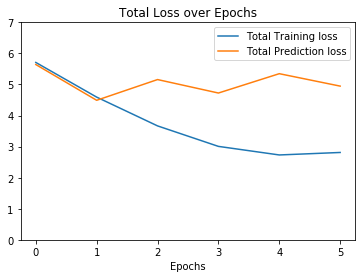

In [57]:
plt.plot(model_4_training.history['loss'])
plt.xlabel('Epochs')
plt.ylim([0, 7])
plt.title('Total Loss over Epochs')
plt.plot(model_4_training.history['val_loss'])
plt.legend(['Total Training loss', 'Total Prediction loss'])

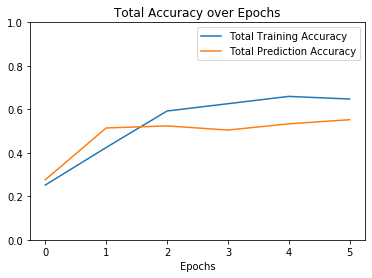

In [58]:
plt.plot(model_4_training.history['Classification_acc'])
plt.xlabel('Epochs')
plt.ylim([0, 1])
plt.title('Total Accuracy over Epochs')
plt.plot(model_4_training.history['val_Classification_acc'])
plt.legend(['Total Training Accuracy', 'Total Prediction Accuracy'])

In [107]:
model_4_prediction = pd.DataFrame(model_4.predict(X_test_scaled)[1])
model_4_prediction.columns = ['draw', 'lost', 'won']

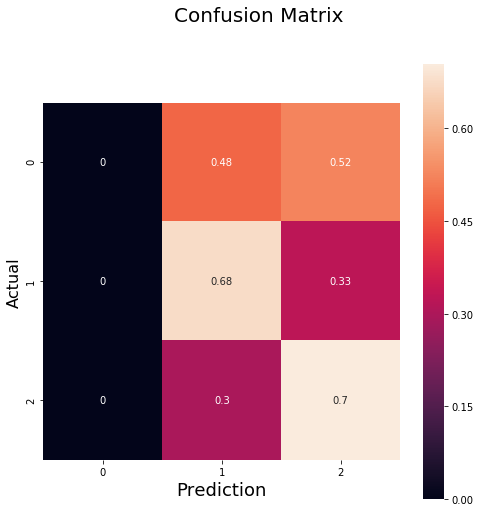

In [111]:
from sklearn.metrics import confusion_matrix
fig, ax = plt.subplots(1, 1, figsize=(8,8))
cm = confusion_matrix([np.argmax(x) for x in y_class_test.values], [np.argmax(x) for x in model_4_prediction.values])
cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
sns.heatmap(cm, ax = ax, annot=True, square=True)
fig.suptitle('Confusion Matrix', fontsize=20)
plt.xlabel('Prediction', fontsize=18)
plt.ylabel('Actual', fontsize=16)
plt.show()

In [109]:
cm

array([[0.        , 0.47619048, 0.52380952],
       [0.        , 0.675     , 0.325     ],
       [0.        , 0.29545455, 0.70454545]])

In [81]:
y_class_test

,draw,lost,won
397,0,1,0
162,0,0,1
406,0,1,0
142,0,0,1
439,0,1,0
36,0,1,0
72,0,1,0
5,1,0,0
329,0,0,1
48,0,0,1


In [61]:
scaler.fit(pred_df)

pred_df_scaled = scaler.transform(pred_df)


In [71]:
model_4.predict(pred_df_scaled)

In [63]:
y_cat.head()

,draw,lost,won
0,0,1,0
1,0,1,0
2,0,0,1
3,0,1,0
4,1,0,0


In [64]:
pred_df

,year,month,break,homeTotalGoalDiff,guestTotalGoalDiff,homeTeamGoalsDiffAtHome,homeTeamGoalsDiffAway,guestTeamGoalsDiffAtHome,guestTeamGoalsDiffAway,hoamAvgPoints,...,SV Ried,SV Wimpassing,Shkendija Tetovo,Slovan Bratislava,Spartak Moskau,TSV Hartberg,Vitória Guimarães SC,WSG Tirol,Wolfsberger AC,ZSKA Sofia
0,2019,7,7,0.837838,1.309524,0.611111,-0.473684,1.333333,1.285714,1.378378,...,0,0,0,0,0,0,0,0,0,0
1,2019,7,6,0.600000,-0.500000,-0.294118,0.444444,2.000000,-3.000000,1.200000,...,0,0,0,0,0,0,0,1,0,0
2,2019,7,6,0.888889,-0.857143,0.166667,-1.111111,-0.705882,-1.000000,1.166667,...,0,0,0,0,0,0,0,0,0,0
3,2020,7,9,2.283019,-0.117647,2.125000,1.448276,0.058824,-0.294118,2.509434,...,0,0,0,0,0,0,0,0,0,0
4,2019,7,8,0.861111,-0.282051,0.333333,-0.055556,-0.210526,-0.350000,1.527778,...,0,0,0,0,0,0,0,0,0,0
5,2019,7,7,0.648649,0.220000,-0.187500,-0.571429,0.583333,-0.115385,1.216216,...,0,0,0,0,0,0,0,0,0,0


In [65]:
model_4.load_weights("best_model.hdf5")

In [66]:
model_4.compile(loss=['mse', 'categorical_crossentropy'],
             optimizer='adam',
             metrics=['accuracy'])

In [67]:
model_4.predict(pred_df_scaled)

[array([[-1.1923045 ],
        [ 0.34917703],
        [ 0.08526858],
        [ 2.5349035 ],
        [ 0.08401655],
        [-0.7695969 ]], dtype=float32),
 array([[0.2074303 , 0.4869408 , 0.14618558],
        [0.4562195 , 0.5764862 , 0.6075672 ],
        [0.40733102, 0.561346  , 0.5150246 ],
        [0.8139986 , 0.6941713 , 0.9723289 ],
        [0.4071026 , 0.5612739 , 0.5145779 ],
        [0.2648248 , 0.5116577 , 0.2384822 ]], dtype=float32)]

In [68]:
model_4.predict(scaler.fit_transform(df))

[array([[-9.44266856e-01],
        [-6.45613623e+00],
        [ 1.21873319e+00],
        [-2.64660120e+00],
        [-3.57465005e+00],
        [ 1.92178738e+00],
        [-9.38389659e-01],
        [ 2.03704977e+00],
        [-1.56128430e+00],
        [-4.33397412e-01],
        [ 3.78616881e+00],
        [ 2.65778446e+00],
        [ 7.73412585e-02],
        [ 1.63327992e+00],
        [-4.22295719e-01],
        [-3.18418533e-01],
        [-1.58275008e+00],
        [ 2.01664662e+00],
        [ 1.72959602e+00],
        [ 1.70476425e+00],
        [-1.38213074e+00],
        [-7.05188692e-01],
        [-4.77415413e-01],
        [-3.26426482e+00],
        [ 1.88264585e+00],
        [ 1.74352199e-01],
        [-1.12607729e+00],
        [ 2.76524115e+00],
        [ 1.80648983e+00],
        [-5.60078919e-01],
        [ 2.09811306e+00],
        [ 1.64208055e-01],
        [-1.02934502e-01],
        [-2.56207943e-01],
        [ 1.80632448e+00],
        [ 1.39731848e+00],
        [-1.81175745e+00],
 